<center><h1>Udacity Machine Learning Project - Enron Data - Randy Crane</h1></center>

<h2>Introduction</h2>



<h2>Project Overview</h2>

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, you will play detective, and put your new skills to use by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. To assist you in your detective work, we've combined this data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

In [1]:
import os
os.getcwd()

'C:\\Users\\randy'

In [2]:
os.chdir('D:\\Documents\\School - WGU\\Term 4\\C753\\ud120-projects-master\\final_project')

os.getcwd()

'D:\\Documents\\School - WGU\\Term 4\\C753\\ud120-projects-master\\final_project'

In [3]:
#!/usr/bin/python

import sys
import pickle
import matplotlib.pyplot as plt
sys.path.append("../tools/")
from pprint import pprint
#from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import operator
import scikitplot as skplt
import seaborn as sns; sns.set(style="ticks", color_codes=True)


import pprint
pretty = pprint.PrettyPrinter()

In [4]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [5]:
### Convert the file to Pandas dataframe
    
enron = pd.DataFrame.from_dict(data_dict, orient = 'index')

print 'Example Value Dictionary of Features'
pretty.pprint(data_dict['ALLEN PHILLIP K']) 
pretty.pprint(len(data_dict['ALLEN PHILLIP K'])) 

Example Value Dictionary of Features
{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}
21


In [6]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".

#Leaving email address from the original list of features out, 
#as that is not something measureable or countable, and the information I could 
#get from it is redundant to the key value.

features_list = [
        'poi',
        'salary',
        'deferral_payments',
        'total_payments',
        'loan_advances',
        'bonus',
        'restricted_stock_deferred',
        'deferred_income',
        'total_stock_value',
        'expenses',
        'exercised_stock_options',
        'other',
        'long_term_incentive',
        'restricted_stock',
        'director_fees', 
        'to_messages',
        'from_poi_to_this_person',
        'from_messages',
        'from_this_person_to_poi',
        'shared_receipt_with_poi'] 

In [7]:
names = sorted(data_dict.keys())  #sort names of Enron employees in dataset by first letter of last name

print 'Sorted list of Enron employees by last name'
pretty.pprint(names) 

Sorted list of Enron employees by last name
['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE'

In [8]:
### Total Number of Data Points
print 'Total Number of data points: %d' %len(data_dict)

Total Number of data points: 146


In [9]:
### Number of POIs
num_poi = len(enron[enron['poi'].astype(np.float32)==1])
num_non_poi = len(data_dict) - num_poi

print 'Number of POIs:' + str(num_poi)
print 'Number of Non-POIs:' + str(num_non_poi)

Number of POIs:18
Number of Non-POIs:128


In [10]:
### Number of Features

print 'Number of features: %d' %len(features_list)

Number of features: 20


In [11]:
### Missing Features
from tabulate import tabulate

features_nan = {}
for name, feature in data_dict.iteritems():
    for feature_key, val in feature.iteritems():
        if val == 'NaN':
            # Assign 0 to value
            feature[feature_key] = 0
            if features_nan.get(feature_key):
                features_nan[feature_key] = features_nan.get(feature_key) + 1
            else:
                features_nan[feature_key] = 1

print '# of Missing Values by Feature:'
print ''
print ("{:<25} {:<5}".format('FEATURE', 'COUNT'))
print '-------------------------------'
for key, value in features_nan.items(): 
    print ("{:<25} {:<5}".format(key, value))

# of Missing Values by Feature:

FEATURE                   COUNT
-------------------------------
salary                    51   
to_messages               60   
deferral_payments         107  
total_payments            21   
long_term_incentive       80   
loan_advances             142  
bonus                     64   
restricted_stock          36   
restricted_stock_deferred 128  
total_stock_value         20   
shared_receipt_with_poi   60   
from_poi_to_this_person   60   
exercised_stock_options   44   
from_messages             60   
other                     53   
from_this_person_to_poi   60   
deferred_income           97   
expenses                  51   
email_address             35   
director_fees             129  


In [12]:
#feature_format

  
#!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm
    n--no. of key-value pairs in dictonary
    k--no. of features being extracted
    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person
    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for
    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:
    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)
    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)
        return targets and features as separate lists
        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features


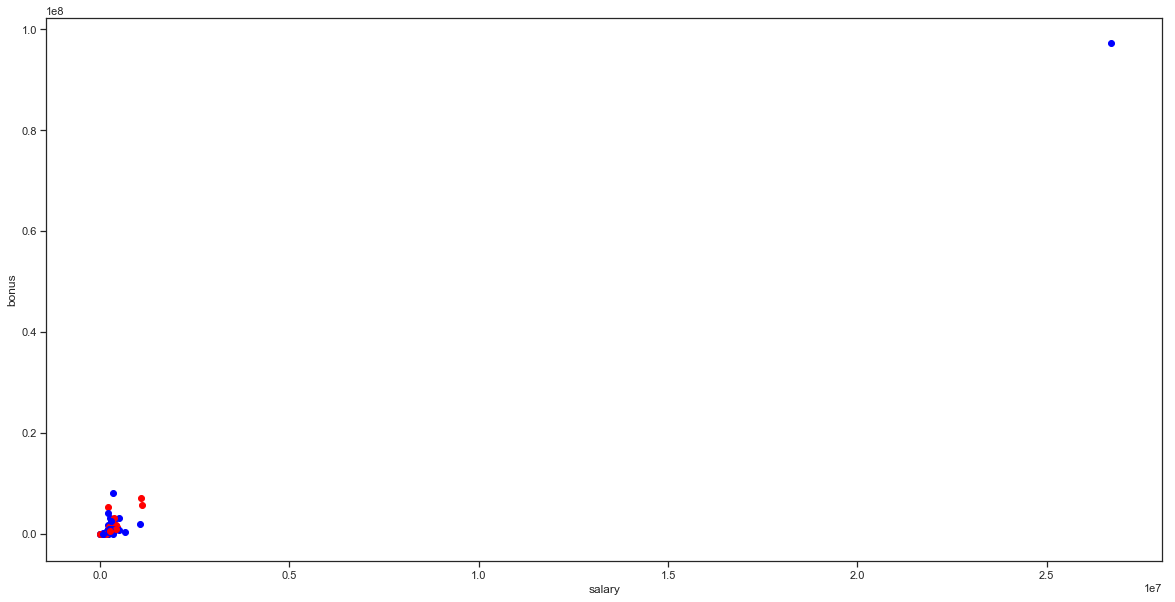

In [13]:
### Task 2: Remove outliers

features = ['salary', 'bonus', 'poi']
data = featureFormat(data_dict, features, 'poi')
plt.figure(figsize=(20, 10))
plt.xlabel('salary')
plt.ylabel('bonus')
for point in data:
    salary = point[0]
    bonus = point[1]
    poi = point[2]
    if poi:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter( salary, bonus, color = color )

In [14]:
#Remove outlier "Total", which is just the summary/total line from the spreadsheet. 
data_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 0,
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 0,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 0,
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 0,
 'to_messages': 0,
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [15]:
#Remove outlier "LOCKHART EUGENE E", for whom all data is NaN or 0. 
data_dict.pop('LOCKHART EUGENE E', 0)

{'bonus': 0,
 'deferral_payments': 0,
 'deferred_income': 0,
 'director_fees': 0,
 'email_address': 0,
 'exercised_stock_options': 0,
 'expenses': 0,
 'from_messages': 0,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 0,
 'loan_advances': 0,
 'long_term_incentive': 0,
 'other': 0,
 'poi': False,
 'restricted_stock': 0,
 'restricted_stock_deferred': 0,
 'salary': 0,
 'shared_receipt_with_poi': 0,
 'to_messages': 0,
 'total_payments': 0,
 'total_stock_value': 0}

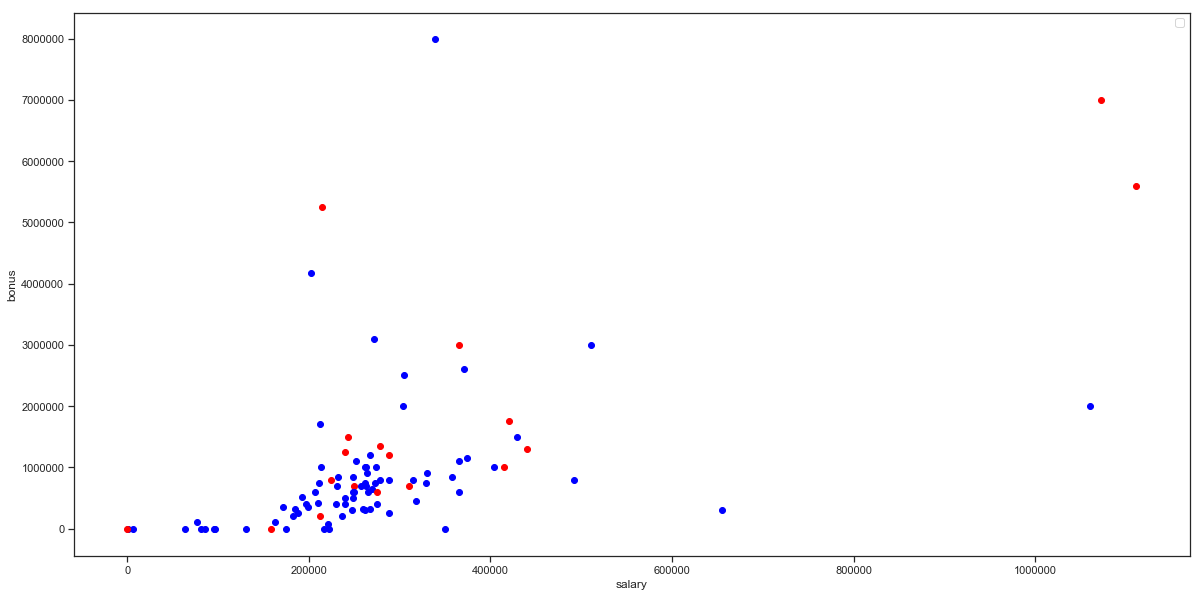

In [16]:
features = ['salary', 'bonus', 'poi']
data = featureFormat(data_dict, features, 'poi')
plt.figure(figsize=(20, 10))
plt.xlabel('salary')
plt.ylabel('bonus')
plt.legend()
for point in data:
    salary = point[0]
    bonus = point[1]
    poi = point[2]
    if poi:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter( salary, bonus, color = color )

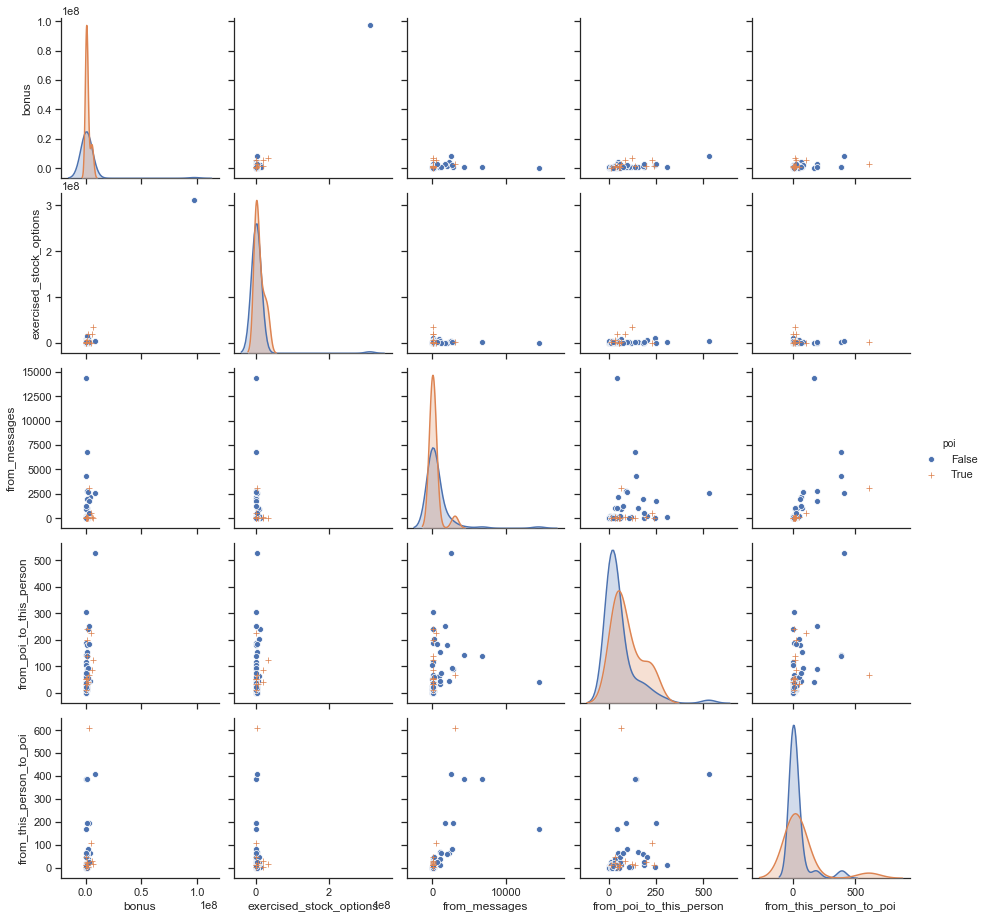

In [17]:
#Create pairsplot to get an overview of what interesting relationships there may be 
#between features that could be used to engineer new features.

g = sns.pairplot(enron, vars=['bonus','exercised_stock_options','from_messages','from_poi_to_this_person', 'from_this_person_to_poi'],
                 dropna=True, diag_kind='kde', hue='poi', markers=['o','+'])

In [18]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [19]:
def computeRatio(messages, features_list):
    ratio = 0.
    if (messages == 0 or features_list == 0):
        return ratio
    ratio = messages / float(features_list)
    return ratio


def newFeatures(my_dataset):
    for poi_name in my_dataset:
        data_point = my_dataset[poi_name]
        data_point['from_poi_to_this_person_ratio'] = computeRatio(data_point['from_poi_to_this_person'],
                                                                   data_point['to_messages'])
        data_point['from_this_person_to_poi_ratio'] = computeRatio(data_point['from_this_person_to_poi'],
                                                                   data_point['from_messages'])
        data_point['bonus_salary_ratio'] = computeRatio(data_point['bonus'],
                                                                   data_point['salary'])
        data_point['bonus_total_payments_ratio'] = computeRatio(data_point['bonus'],
                                                                   data_point['total_payments'])
        data_point['shared_receipt_with_poi_to_messages_ratio'] = computeRatio(data_point['shared_receipt_with_poi'],
                                                                   data_point['to_messages'])

    return my_dataset, ['from_poi_to_this_person_ratio', 
                        'from_this_person_to_poi_ratio', 
                        'bonus_salary_ratio', 
                        'bonus_total_payments_ratio',
                        'shared_receipt_with_poi_to_messages_ratio' 
                       ]

my_dataset, new_features = newFeatures(my_dataset)
features_list = features_list + new_features

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [20]:
print features_list

['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'from_poi_to_this_person_ratio', 'from_this_person_to_poi_ratio', 'bonus_salary_ratio', 'bonus_total_payments_ratio', 'shared_receipt_with_poi_to_messages_ratio']


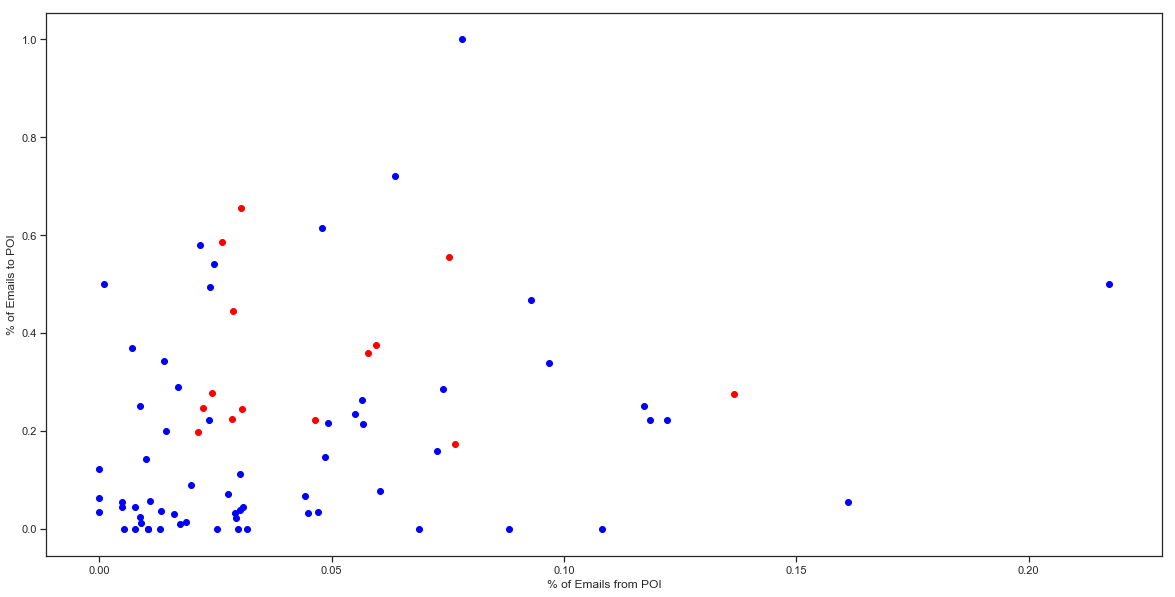

In [21]:
features_list_ratios = ['poi', 'from_poi_to_this_person_ratio', 'from_this_person_to_poi_ratio']    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list_ratios
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list_ratios)

### plot new features
plt.figure(figsize=(20, 10))
for point in data:
    if point[0] == 1:
        color = 'red'
    else:
        color = 'blue'
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi, color = color )
plt.xlabel('% of Emails from POI')
plt.ylabel('% of Emails to POI')
plt.show()

In [22]:
enron_updated = pd.DataFrame.from_dict(my_dataset, orient = 'index')

print 'Example Value Dictionary with New Features'
pretty.pprint(my_dataset['ALLEN PHILLIP K']) 
pretty.pprint(len(my_dataset['ALLEN PHILLIP K'])) 

Example Value Dictionary with New Features
{'bonus': 4175000,
 'bonus_salary_ratio': 20.672922185635414,
 'bonus_total_payments_ratio': 0.9309965431596617,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 0,
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_poi_to_this_person_ratio': 0.016195727084769126,
 'from_this_person_to_poi': 65,
 'from_this_person_to_poi_ratio': 0.029612756264236904,
 'loan_advances': 0,
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'shared_receipt_with_poi_to_messages_ratio': 0.4848380427291523,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}
26


C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\seaborn\distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


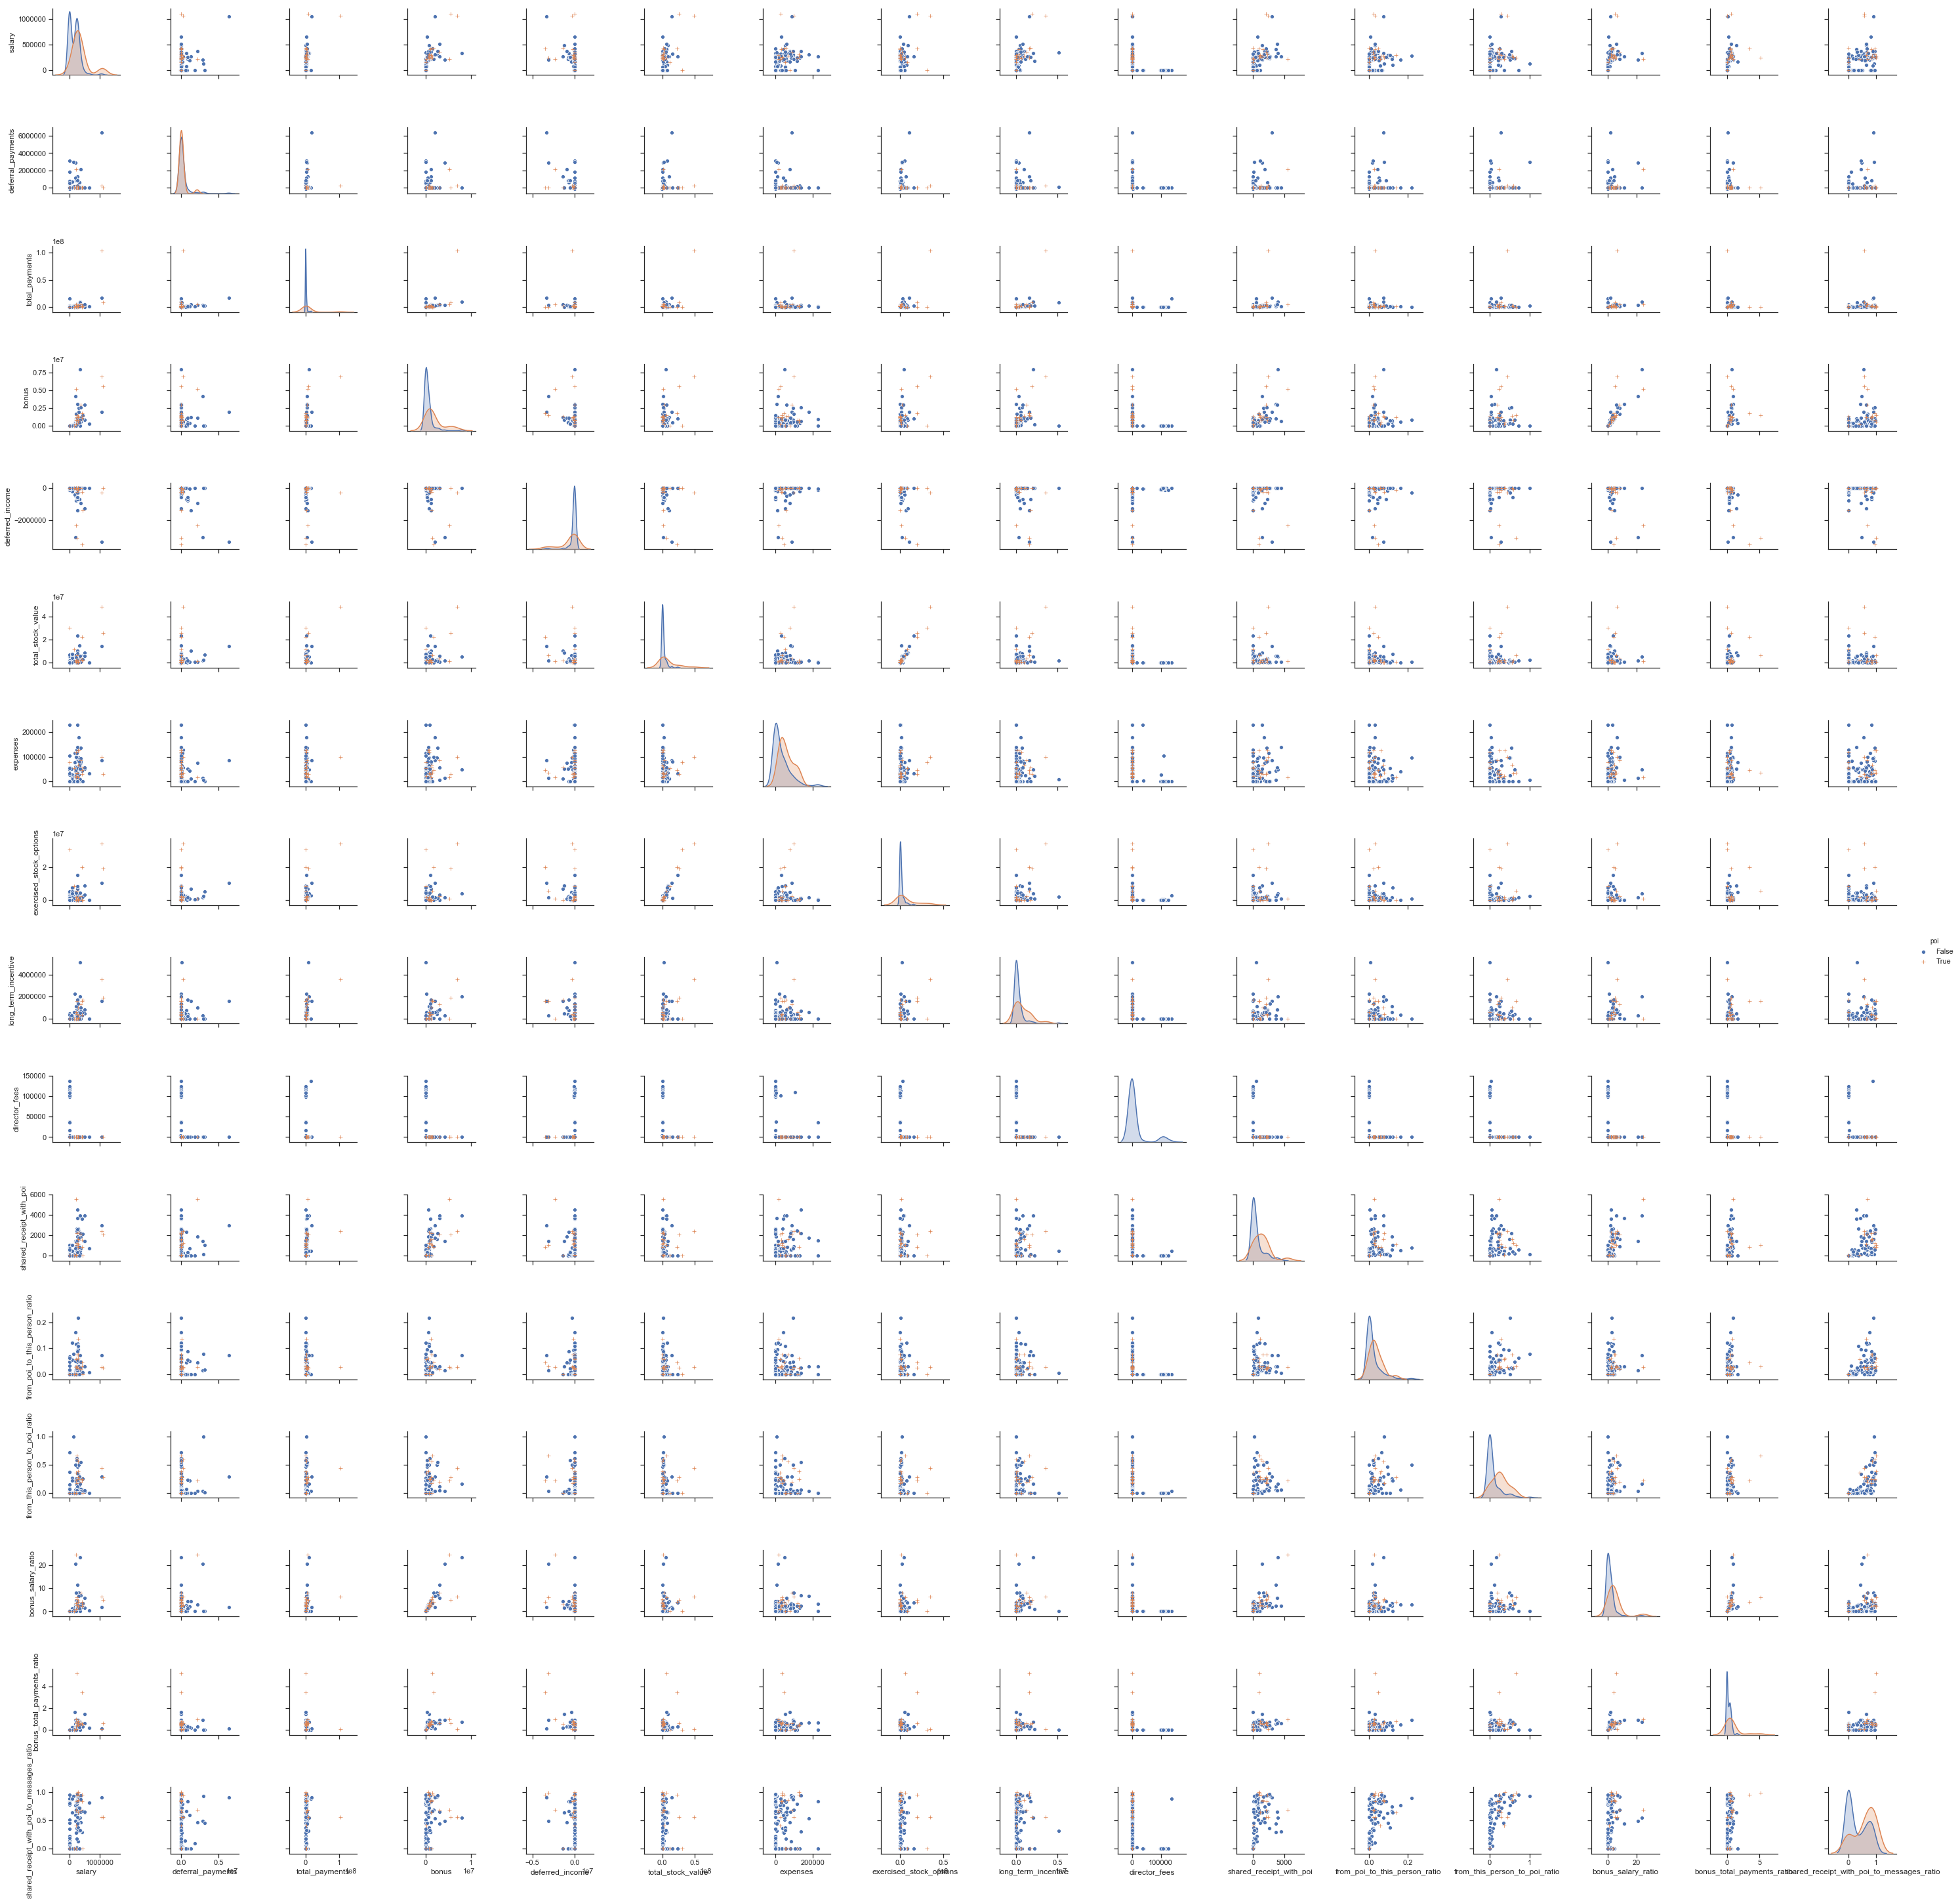

In [23]:
#Create new pairsplot to get an overview of what interesting relationships there may be 
#between features including new features.

g = sns.pairplot(enron_updated, vars=['salary', 
                                      'deferral_payments', 
                                      'total_payments', 
                                      'bonus', 
                                      'deferred_income', 
                                      'total_stock_value', 
                                      'expenses', 
                                      'exercised_stock_options', 
                                      'long_term_incentive', 
                                      'director_fees', 
                                      'shared_receipt_with_poi', 
                                      'from_poi_to_this_person_ratio', 
                                      'from_this_person_to_poi_ratio',
                                      'bonus_salary_ratio', 
                                      'bonus_total_payments_ratio',
                                      'shared_receipt_with_poi_to_messages_ratio'
                                     ],
                 dropna=True, diag_kind='kde', hue='poi', markers=['o','+'])

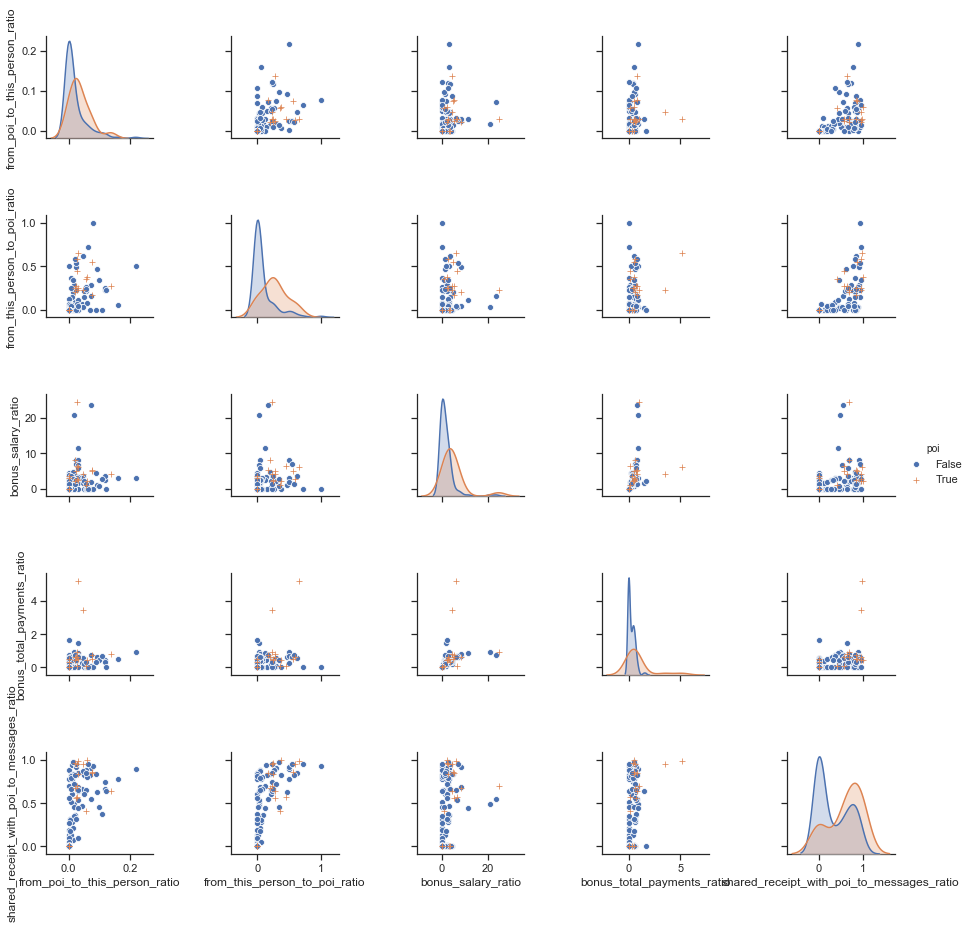

In [24]:
#Just the ratios

g = sns.pairplot(enron_updated, vars=['from_poi_to_this_person_ratio', 
                                      'from_this_person_to_poi_ratio',
                                      'bonus_salary_ratio', 
                                      'bonus_total_payments_ratio',
                                      'shared_receipt_with_poi_to_messages_ratio'
                                     ],
                 dropna=True, diag_kind='kde', hue='poi', markers=['o','+'])

In [25]:
# function using SelectKBest
def findKbestFeatures(data_dict, features_list, k):
    data = featureFormat(data_dict, features_list)
    labels, features = targetFeatureSplit(data)

    k_best = SelectKBest(f_classif, k=k)
    k_best.fit(features, labels)
    scores = k_best.scores_
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    # print "sorted_pairs", sorted_pairs
    k_best_features = dict(sorted_pairs[:k])

    return k_best_features

num_features = 15
selectedBestFeatures = findKbestFeatures(my_dataset, features_list, num_features)
sortedBestFeatures = sorted(selectedBestFeatures.items(), key=lambda x: x[1], reverse = True)
selectedFeatures = ['poi'] + selectedBestFeatures.keys()


print "SELECTED 15 BEST FEATURES BY KBEST:"
print ''
print ("{:<30} {:<5}".format('FEATURE', 'STRENGTH'))
print '--------------------------------------------'
for i in sortedBestFeatures: 
    print ("{:<30} {:<5}".format(i[0], i[1]))

SELECTED 15 BEST FEATURES BY KBEST:

FEATURE                        STRENGTH
--------------------------------------------
exercised_stock_options        25.0975415287
total_stock_value              24.4676540475
bonus                          21.0600017075
bonus_total_payments_ratio     20.9887684881
salary                         18.575703268
from_this_person_to_poi_ratio  16.6417070705
deferred_income                11.5955476597
bonus_salary_ratio             10.9556270745
long_term_incentive            10.0724545294
restricted_stock               9.34670079105
shared_receipt_with_poi_to_messages_ratio 9.29623187148
total_payments                 8.86672153711
shared_receipt_with_poi        8.74648553213
loan_advances                  7.24273039654
expenses                       6.23420114051


In [26]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [27]:
clf = DecisionTreeClassifier()

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]


print 'Decision Tree Classifier'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)
print '\nFeature Ranking: '
for i in range(24):
    print "{} feature {} ({})".format(i+1,features_list[i+1],round(importances[indices[i]],4))

Decision Tree Classifier
Accuracy: 0.7955
Precision: 0.4
Recall: 0.25
F1 Score: 0.3077

Feature Ranking: 
1 feature salary (0.3271)
2 feature deferral_payments (0.2885)
3 feature total_payments (0.2788)
4 feature loan_advances (0.0624)
5 feature bonus (0.0431)
6 feature restricted_stock_deferred (0.0)
7 feature deferred_income (0.0)
8 feature total_stock_value (0.0)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)
11 feature other (0.0)
12 feature long_term_incentive (0.0)
13 feature restricted_stock (0.0)
14 feature director_fees (0.0)
15 feature to_messages (0.0)
16 feature from_poi_to_this_person (0.0)
17 feature from_messages (0.0)
18 feature from_this_person_to_poi (0.0)
19 feature shared_receipt_with_poi (0.0)
20 feature from_poi_to_this_person_ratio (0.0)
21 feature from_this_person_to_poi_ratio (0.0)
22 feature bonus_salary_ratio (0.0)
23 feature bonus_total_payments_ratio (0.0)
24 feature shared_receipt_with_poi_to_messages_ratio (0.0)


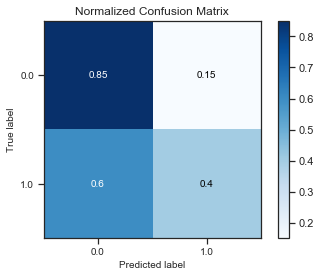

In [28]:
skplt.metrics.plot_confusion_matrix(labels_test, prediction, normalize=True)

In [29]:
# Provided to give you a starting point. Try a variety of classifiers.
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)


print 'Gaussian Naive Bayes Classifier'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

Gaussian Naive Bayes Classifier
Accuracy: 0.8864
Precision: 0.4
Recall: 0.5
F1 Score: 0.4444


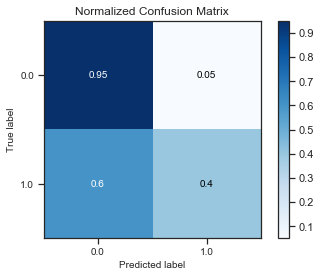

In [30]:
skplt.metrics.plot_confusion_matrix(labels_test, prediction, normalize=True)

In [31]:
clf = SVC()

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'Support Vector Classifier'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

Support Vector Classifier
Accuracy: 0.8864
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [32]:
clf = KNeighborsClassifier()

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'K-Neighbors Classifier'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

K-Neighbors Classifier
Accuracy: 0.8864
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [33]:
clf = RandomForestClassifier()

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'Random Forest Classifier'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

Random Forest Classifier
Accuracy: 0.9091
Precision: 0.2
Recall: 1.0
F1 Score: 0.3333


C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
clf = AdaBoostClassifier()

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'AdaBoost Classifier'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

AdaBoost Classifier
Accuracy: 0.8182
Precision: 0.2
Recall: 0.2
F1 Score: 0.2


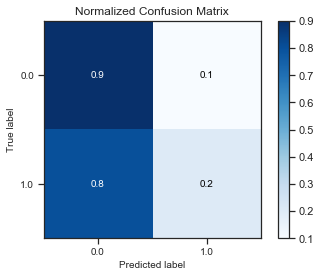

In [35]:
skplt.metrics.plot_confusion_matrix(labels_test, prediction, normalize=True)

In [36]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

X = np.array(features)
y = np.array(labels)
sss = StratifiedShuffleSplit(n_splits = 1000, test_size=0.3, random_state=42)   
 
for train_index, test_index in sss.split(X, y):
    features_train, features_test = X[train_index], X[test_index]
    labels_train, labels_test = y[train_index], y[test_index]

In [37]:
#DecisionTreeClassifier Tuning
parameters = {'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
svr = DecisionTreeClassifier()
clf = GridSearchCV(svr, parameters)
clf.fit(features_train, labels_train)

cri1 = clf.best_params_['min_samples_split']

print cri1

5


C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
clf = DecisionTreeClassifier(min_samples_split=cri1)
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]


print 'Decision Tree Classifier - Tuned'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)
print '\nFeature Ranking: '
for i in range(24):
    print "{} feature {} ({})".format(i+1,features_list[i+1],round(importances[indices[i]],4))

Decision Tree Classifier - Tuned
Accuracy: 0.75
Precision: 0.3333
Recall: 0.2222
F1 Score: 0.2667

Feature Ranking: 
1 feature salary (0.3289)
2 feature deferral_payments (0.1891)
3 feature total_payments (0.1529)
4 feature loan_advances (0.1299)
5 feature bonus (0.1223)
6 feature restricted_stock_deferred (0.0768)
7 feature deferred_income (0.0)
8 feature total_stock_value (0.0)
9 feature expenses (0.0)
10 feature exercised_stock_options (0.0)
11 feature other (0.0)
12 feature long_term_incentive (0.0)
13 feature restricted_stock (0.0)
14 feature director_fees (0.0)
15 feature to_messages (0.0)
16 feature from_poi_to_this_person (0.0)
17 feature from_messages (0.0)
18 feature from_this_person_to_poi (0.0)
19 feature shared_receipt_with_poi (0.0)
20 feature from_poi_to_this_person_ratio (0.0)
21 feature from_this_person_to_poi_ratio (0.0)
22 feature bonus_salary_ratio (0.0)
23 feature bonus_total_payments_ratio (0.0)
24 feature shared_receipt_with_poi_to_messages_ratio (0.0)


In [39]:
#DecisionTreeClassifier Tuning
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
svr = KNeighborsClassifier()
clf = GridSearchCV(svr, parameters)
clf.fit(features_train, labels_train)

cri1 = clf.best_params_['n_neighbors']
cri2 = clf.best_params_['algorithm']
cri3 = clf.best_params_['leaf_size']

print cri1, cri2, cri3

2 auto 5


C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
clf = KNeighborsClassifier(n_neighbors = cri1, algorithm = cri2, leaf_size = cri3)
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'K-Neighbors Classifier - Tuned'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

K-Neighbors Classifier - Tuned
Accuracy: 0.8636
Precision: 0.1667
Recall: 0.5
F1 Score: 0.25


In [41]:
#RandomForest Tuning
parameters = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200], 
    'criterion': ['gini', 'entropy']}
svr = RandomForestClassifier()
clf = GridSearchCV(svr, parameters)
clf.fit(features_train, labels_train)

cri1 = clf.best_params_['n_estimators']
cri2 = clf.best_params_['criterion']

print cri1, cri2

10 gini


C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
clf = RandomForestClassifier(n_estimators = cri1, criterion = cri2)

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'Random Forest Classifier - Tuned'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

Random Forest Classifier - Tuned
Accuracy: 0.8182
Precision: 0.1667
Recall: 0.25
F1 Score: 0.2


In [48]:
#AdaBoost Tuning
parameters = {
    'n_estimators': [250, 500, 1000, 1250, 1500],
    'random_state': [101, 202, 303],
    'learning_rate': [0.75, 1.0, 1.25],
    'algorithm': ['SAMME', 'SAMME.R']
}
svr = AdaBoostClassifier()
clf = GridSearchCV(svr, parameters)
clf.fit(features_train, labels_train)

cri1 = clf.best_params_['n_estimators']
cri2 = clf.best_params_['random_state']
cri3 = clf.best_params_['learning_rate']
cri4 = clf.best_params_['algorithm']

print cri1, cri2, cri3, cri4

C:\Users\randy\Anaconda3\envs\py27\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


500 101 0.75 SAMME


In [58]:
clf = AdaBoostClassifier(n_estimators = cri1, random_state = cri2, learning_rate = cri3, algorithm = cri4)

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'AdaBoost Classifier - Tuned'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

AdaBoost Classifier - Tuned
Accuracy: 0.7955
Precision: 0.3333
Recall: 0.2857
F1 Score: 0.3077


In [ ]:
#Possible remaining analysis before report:

#Choose an algorithm and apply to KBest features with parameter tuning.
## Need to figure out how to use just those features in the train & test sets?
#MinMaxScaler probably not necessary
#Some regressions?

In [ ]:
#SVC Tuning
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(features_train, labels_train)


cri1 = clf.best_params_['kernel']
cri2 = clf.best_params_['C']

print cri1, cri2

In [ ]:
clf = SVC('kernel' = cri1, 'C' = cri2)

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)

print 'Support Vector Classifier - Tuned'
print 'Accuracy:', round(accuracy_score(prediction, labels_test),4)
print 'Precision:', round(precision_score(prediction, labels_test),4)
print 'Recall:', round(recall_score(prediction, labels_test),4)
print 'F1 Score:', round(f1_score(prediction, labels_test),4)

In [ ]:
#!/usr/bin/pickle

#tester.py

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

'''
import pickle
import sys
from sklearn.model_selection import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(n_splits=folds, random_state=42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv.split(features, labels): 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()
'''

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

#dump_classifier_and_data(clf, my_dataset, features_list)